Import Module

In [1]:
import scPAFA
import scanpy as sc
import json

ModuleNotFoundError: No module named 'scPAFA'

Use scanpy to read anndata in h5ad format, which contain single-cell gene expression matrix

In [ ]:
#read_adata_single_cell
#lupus_dataset
adata_orig = sc.read_h5ad('kang_counts_25k.h5ad')

Import pathway collection

Quality control and reformat of pathway collection

In [ ]:
from ivae.bio import get_reactome_adj

pathway_df = get_reactome_adj()
pathway_df.head()

geneset,REACTOME_2_LTR_CIRCLE_FORMATION,REACTOME_ABACAVIR_METABOLISM,REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT,REACTOME_ABACAVIR_TRANSPORT_AND_METABOLISM,REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT,REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS,REACTOME_ABC_TRANSPORTER_DISORDERS,REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS,REACTOME_ABERRANT_REGULATION_OF_MITOTIC_G1_S_TRANSITION_IN_CANCER_DUE_TO_RB1_DEFECTS,REACTOME_ABORTIVE_ELONGATION_OF_HIV_1_TRANSCRIPT_IN_THE_ABSENCE_OF_TAT,...,REACTOME_WNT5A_DEPENDENT_INTERNALIZATION_OF_FZD2_FZD5_AND_ROR2,REACTOME_WNT5A_DEPENDENT_INTERNALIZATION_OF_FZD4,REACTOME_WNT_LIGAND_BIOGENESIS_AND_TRAFFICKING,REACTOME_WNT_MEDIATED_ACTIVATION_OF_DVL,REACTOME_XENOBIOTICS,REACTOME_YAP1_AND_WWTR1_TAZ_STIMULATED_GENE_EXPRESSION,REACTOME_ZBP1_DAI_MEDIATED_INDUCTION_OF_TYPE_I_IFNS,REACTOME_ZINC_EFFLUX_AND_COMPARTMENTALIZATION_BY_THE_SLC30_FAMILY,REACTOME_ZINC_INFLUX_INTO_CELLS_BY_THE_SLC39_GENE_FAMILY,REACTOME_ZINC_TRANSPORTERS
genesymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4GNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pathway_dict = {}
for col in pathway_df:
    data = pathway_df[col]
    data = data.index[data>0].tolist()
    pathway_dict[col] = data

In [ ]:
#pathway_input_qc_by_overlapgene
res = []
for i in range(1):
    adata = sc.pp.subsample(adata_orig, fraction=0.5, copy=True, random_state=i)
    pathway_input = scPAFA.tl.generate_pathway_input(adata = adata, pathway_dict = pathway_dict,min_overlap_gene=6)
    #step1_generate_rank_matrix
    rank_matrix = scPAFA.tl.fast_ucell_rank(adata=adata,maxRank=2000,n_cores_rank=10,rank_batch_size=100000)
    #step2_UCell_compute
    Ucell_result =  scPAFA.tl.fast_ucell_score(cell_index = list(adata.obs.index),rankmatrix=rank_matrix,maxRank=1800,n_cores_score=10,score_batch_size = 100000,input_dict = pathway_input)
    res.append(Ucell_result)

Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:04<00:00, 335.38it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:04<00:00, 340.85it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:04<00:00, 329.19it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:04<00:00, 333.94it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:24<00:00,  2.46s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:03<00:00, 346.53it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:03<00:00, 348.31it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:03<00:00, 353.21it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:03<00:00, 425.52it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:03<00:00, 409.75it/s]


Ucell_done
Outputing_dataframe
Filtered out 240 pathways
1375 pathways passed QC
The maxRank must >= 1434 (The genes number of the longest pathway)
adata.X is csr sparse matrix
Step1 generate rank matrix
1 batches need to rank, with each max 100000 cells
Processing_batch_1


Ranking Chunks: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Rank done
The output rank matrix can be used to calculate UCell score on different pathways set.
The maxRank parameter use with this rank matrix in fast_ucell_score() must <= 2000
Subset rank matrix by overlap genes in pathways
Rank above maxRank to 0
step2 calculating Score
1 batches need to score, with each max 100000 cells
processing_batch_1


Pathways: 100%|██████████| 1375/1375 [00:04<00:00, 341.14it/s]


Ucell_done
Outputing_dataframe


In [7]:
from sklearn.cluster import MiniBatchKMeans
from multiprocessing import cpu_count
from sklearn.metrics import adjusted_mutual_info_score

batch_size = 256 * cpu_count() + 1
scores = []

for i, embeddings in enumerate(res):
        y = adata_orig.obs.loc[embeddings.index, "cell_type"]
        n_clusters = y.nunique()
        model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size)
        model.fit(embeddings)
        preds = model.predict(embeddings)
        scores.append(adjusted_mutual_info_score(y, preds))
        print(i)

0
1
2
3
4
5
6
7
8
9


<Axes: >

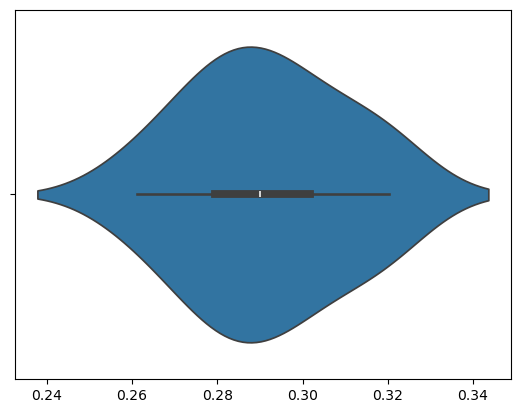

In [8]:
import seaborn as sns

sns.violinplot(x=scores)

In [9]:
import numpy as np

np.abs(embeddings).mean(axis=0)

REACTOME_2_LTR_CIRCLE_FORMATION                             0.094107
REACTOME_ABACAVIR_TRANSPORT_AND_METABOLISM                  0.033224
REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT             0.131146
REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS              0.004180
REACTOME_ABC_TRANSPORTER_DISORDERS                          0.151964
                                                              ...   
REACTOME_XENOBIOTICS                                        0.002038
REACTOME_YAP1_AND_WWTR1_TAZ_STIMULATED_GENE_EXPRESSION      0.002282
REACTOME_ZBP1_DAI_MEDIATED_INDUCTION_OF_TYPE_I_IFNS         0.044826
REACTOME_ZINC_INFLUX_INTO_CELLS_BY_THE_SLC39_GENE_FAMILY    0.018465
REACTOME_ZINC_TRANSPORTERS                                  0.014841
Length: 1375, dtype: float64

In [10]:
from scipy.stats import weightedtau


In [11]:
taus = []
n_res = len(res)

for i in range(n_res):
    embeddings_i = res[i]
    importances_i = np.abs(embeddings_i).mean(axis=0)
    for j in range(i+1, n_res):
        embeddings_j = res[j]
        importances_j = np.abs(embeddings_j).mean(axis=0)
        taus.append(weightedtau(importances_i, importances_j)[0])


<Axes: >

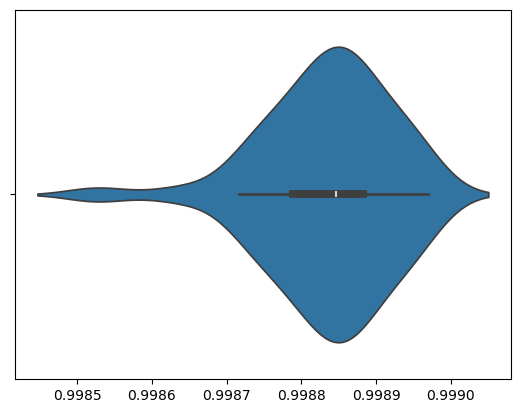

In [12]:
sns.violinplot(x=taus)